Vamos a usar OPENCV para la Vision Artifial
Que podemos hacer:
* Identificar objetos o caras
* Enconttrar imágenes similares
* Extraer modelos 3D
* Reconocer escenarios
* Útil en campos como la robótica y la realidad aumentada
* Clasificar las acciones huymanas que estén en videos

# Que necesitamos

Intalar las siguientes librerias, en caso que no tengamos descargadas selecionar la celda de abajo y pulsar ESC + Y para convertirlo a codigo o ESC + M para convertirlo en markdown

!pip install opencv-python

!pip install opencv-contrib-python

!pip install imutils

!pip install matplotlib

!pip install seaborn

In [11]:
# Importamos las librerias
import cv2 
import imutils
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Buscar en paint los colores como rgb

In [12]:
# Capturamos la cámara
cap = cv2.VideoCapture(2)  # Cambiar el valor según el dispositivo de cámara en mi caso era el 2

# Redimensionamos la cámara
cap.set(3, 640)
cap.set(4, 480)

# Para mantener la cámara activa
while True:
    ret, frame = cap.read()

    # Para detectar los colores del objeto
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Definimos los colores
    amarillo_oscuro = np.array([25, 70, 120])
    amarillo_claro = np.array([30, 255, 255])

    rojo_oscuro = np.array([0, 50, 120])
    rojo_claro = np.array([10, 255, 255])

    verde_oscuro = np.array([40, 70, 80])
    verde_claro = np.array([70, 255, 255])

    azul_oscuro = np.array([90, 60, 0])
    azul_claro = np.array([121, 255, 255])

    # Creamos las máscaras
    cara1 = cv2.inRange(hsv, amarillo_oscuro, amarillo_claro)
    cara2 = cv2.inRange(hsv, rojo_oscuro, rojo_claro)
    cara3 = cv2.inRange(hsv, verde_oscuro, verde_claro)
    cara4 = cv2.inRange(hsv, azul_oscuro, azul_claro)

    # Definimos el contorno del objeto
    cnts1 = cv2.findContours(cara1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cnts1 = imutils.grab_contours(cnts1)

    cnts2 = cv2.findContours(cara2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cnts2 = imutils.grab_contours(cnts2)

    cnts3 = cv2.findContours(cara3, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cnts3 = imutils.grab_contours(cnts3)

    cnts4 = cv2.findContours(cara4, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cnts4 = imutils.grab_contours(cnts4)

    for c in cnts1:
        area1 = cv2.contourArea(c)
        if area1 > 5000:
            cv2.drawContours(frame, [c], -1, (30, 255, 255), 3)
            M = cv2.moments(c)
            cx = int(M["m10"] / M["m00"])
            cy = int(M["m01"] / M["m00"])
            cv2.circle(frame, (cx, cy), 7, (255, 255, 255), -1)
            cv2.putText(frame, "Amarillo", (cx - 20, cy - 20), cv2.FONT_ITALIC, 2, (255, 255, 255), 2)

    for c in cnts2:
        area2 = cv2.contourArea(c)
        if area2 > 5000:
            cv2.drawContours(frame, [c], -1, (0, 0, 255), 3)
            M = cv2.moments(c)
            cx = int(M["m10"] / M["m00"])
            cy = int(M["m01"] / M["m00"])
            cv2.circle(frame, (cx, cy), 7, (255, 255, 255), -1)
            cv2.putText(frame, "Rojo", (cx - 20, cy - 20), cv2.FONT_ITALIC, 2, (255, 255, 255), 2)

    for c in cnts3:
        area3 = cv2.contourArea(c)
        if area3 > 5000:
            cv2.drawContours(frame, [c], -1, (0, 255, 0), 3)
            M = cv2.moments(c)
            cx = int(M["m10"] / M["m00"])
            cy = int(M["m01"] / M["m00"])
            cv2.circle(frame, (cx, cy), 7, (255, 255, 255), -1)
            cv2.putText(frame, "Verde", (cx - 20, cy - 20), cv2.FONT_ITALIC, 2, (255, 255, 255), 2)

    for c in cnts4:
        area4 = cv2.contourArea(c)
        if area4 > 5000:
            cv2.drawContours(frame, [c], -1, (255, 0, 0), 3)
            M = cv2.moments(c)
            cx = int(M["m10"] / M["m00"])
            cy = int(M["m01"] / M["m00"])
            cv2.circle(frame, (cx, cy), 7, (255, 255, 255), -1)
            cv2.putText(frame, "Azul", (cx - 20, cy - 20), cv2.FONT_ITALIC, 2, (255, 255, 255), 2)

    # Muestra la información de la cámara
    cv2.imshow("Video", frame)
    k = cv2.waitKey(1)
    # Pulsar ESC para que se detenga
    if k == 27:
        break

cap.release()
cv2.destroyAllWindows()


KeyboardInterrupt: 

Esto es lo que muestra mi cámara del móvil al sincronizar depende también de la luz que haya (en este caso no había mucha luz), al igual que depende de como indiquemos los colores a mostar, porque el rojo a veces le costaba y el naranja lo marcaba como rojo, pero eso depende de los ajustes que marquemos.

<img src="./imagenes/Prueba_opencv.jpg">


Vamos a probar con matplotlib haciendo un mapa de calor

In [ ]:
# Cargamos la imagen
img = plt.imread("Cubos.jpg")
# Vemos el tamaño de la imagen/dimensiones
img.shape

(961, 1280, 3)

Observamos que la foto es 961 * 1280 y tiene 3 capas si hubiera sido png hubiera tenido 4.

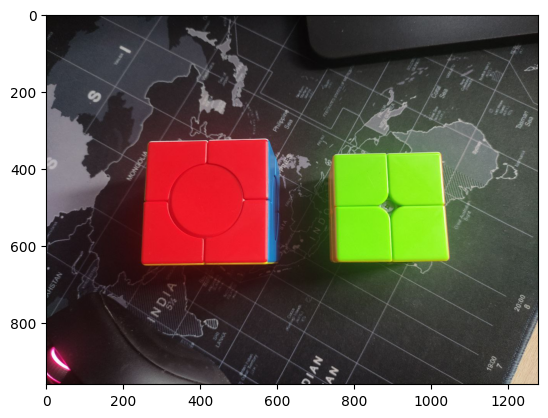

In [5]:
plt.imshow(img)

No vale para nada hacerlo blanco y negro porque los valores pasan a ser 1 a lo mejor abria que pasarlos a log

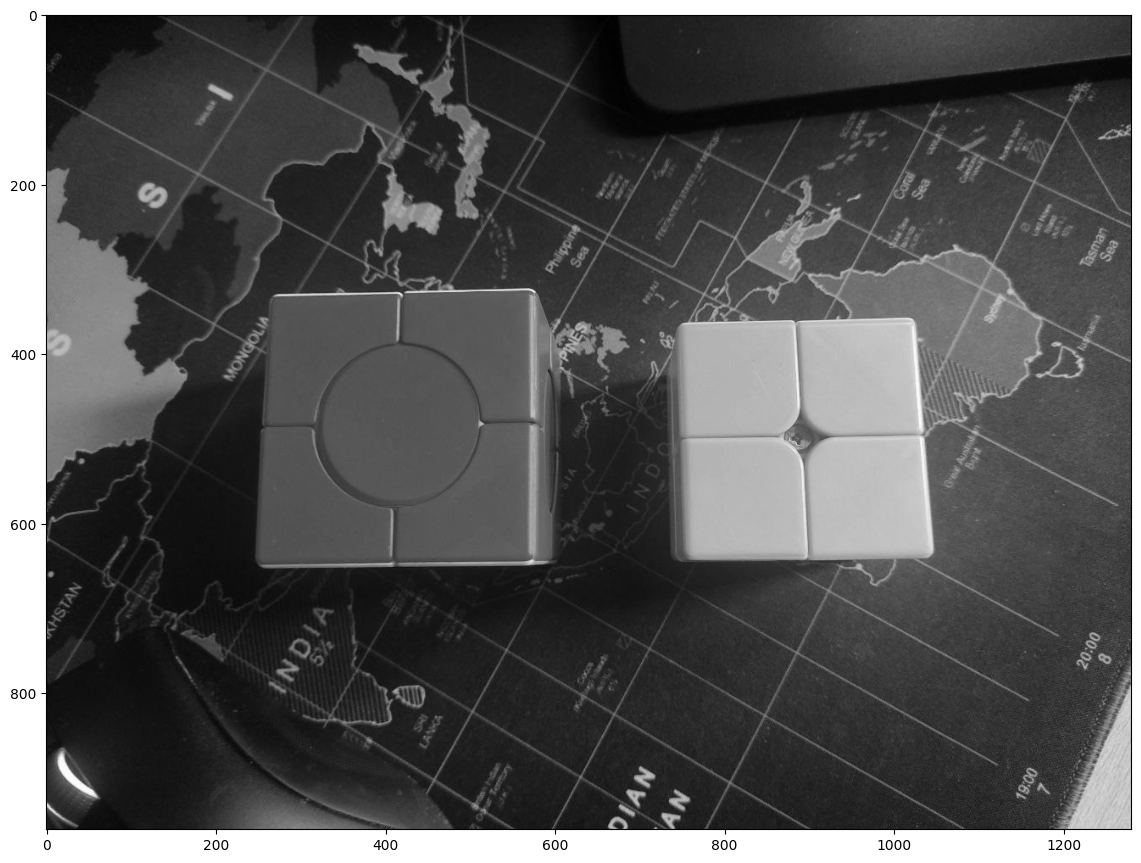

In [9]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 12)
img = plt.imread("Cubos.jpg")
gray = np.dot(img[...,:3], [0.299, 0.587, 0.114])
plt.imshow(gray, cmap = 'gray')
# guardamos la imagen
fig.savefig("cubos_gris.png")
plt.show()

Problemas que encontramos a pasarlo a un mapa de calor que tenemos una imagen de 3 dimenesiones y el mapa de calor son de 2D 


Que son las capas R G B si fuera png tendria cuatro la cual seria la A la cual mide la opacidad

In [3]:
matriz_3d = np.array(img)
matriz_3d

array([[[ 17,  16,  14],
        [ 17,  16,  14],
        [ 17,  16,  14],
        ...,
        [ 58,  58,  58],
        [ 60,  60,  60],
        [ 61,  61,  61]],

       [[ 18,  17,  15],
        [ 18,  17,  15],
        [ 18,  17,  15],
        ...,
        [ 57,  57,  57],
        [ 58,  58,  58],
        [ 58,  58,  58]],

       [[ 18,  17,  15],
        [ 18,  17,  15],
        [ 18,  17,  15],
        ...,
        [ 55,  55,  55],
        [ 55,  55,  55],
        [ 55,  55,  55]],

       ...,

       [[ 40,  42,  28],
        [ 39,  40,  26],
        [ 40,  36,  24],
        ...,
        [221, 197, 169],
        [223, 199, 171],
        [222, 198, 170]],

       [[ 36,  43,  25],
        [ 37,  40,  23],
        [ 39,  35,  23],
        ...,
        [223, 199, 171],
        [226, 202, 174],
        [226, 202, 174]],

       [[ 42,  43,  29],
        [ 35,  33,  20],
        [ 47,  38,  29],
        ...,
        [224, 203, 174],
        [223, 202, 173],
        [216, 195, 166]]

In [16]:
# Pasamos la matriz 3d a 2d pero bamos a perder intensidad y brillo 
matriz_2d = np.mean(matriz_3d, axis=-1)
matriz_2d.shape

(961, 1280)

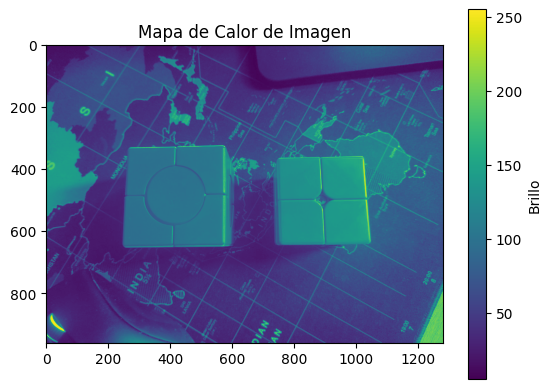

In [18]:
# Creamos el mapa de calor
plt.imshow(matriz_2d, cmap="viridis")
plt.colorbar(label="Brillo")
plt.title("Mapa de Calor de Imagen")
plt.show()



Entonces ais podemos creo yo buscar las tonalidades

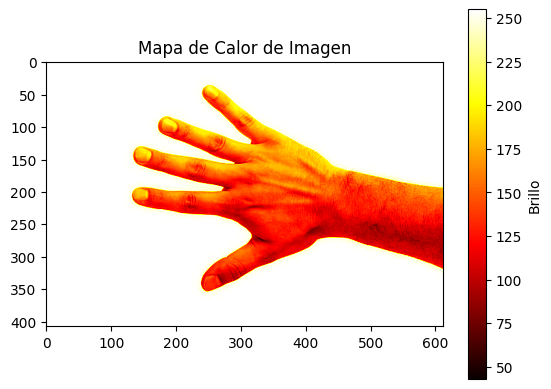

In [20]:
image_mano = plt.imread("mano.jpg")
matrix_mano_3d = np.array(image_mano) 


matrix_mano_2d = np.mean(matrix_mano_3d, axis=-1)


plt.imshow(matrix_mano_2d, cmap="hot")
plt.colorbar(label="Brillo")
plt.title("Mapa de Calor de Imagen")
plt.show()
